# Final Project - Beat the Bookies

## New notebook - exploring hyper-parameters

In [1]:
import pandas as pd 
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

### Import the data

In [21]:
# import the data
import beatthebookies.data as btb
data, test_data = btb.get_data()
data.head()

get_data 0.94


season        date      home_team  away_team  home_team_goal  \
0  2008/2009  2008-08-16        Arsenal  West Brom             1.0   
1  2008/2009  2008-08-16         Bolton      Stoke             3.0   
2  2008/2009  2008-08-16        Everton  Blackburn             2.0   
3  2008/2009  2008-08-16           Hull     Fulham             2.0   
4  2008/2009  2008-08-16  Middlesbrough  Tottenham             2.0   

   away_team_goal FTR  HTHG  HTAG HTR     Referee  home_shots  away_shots  \
0             0.0   H   1.0   0.0   H      H Webb        24.0         5.0   
1             1.0   H   3.0   0.0   H       C Foy        14.0         8.0   
2             3.0   A   1.0   1.0   D  A Marriner        10.0        15.0   
3             1.0   H   1.0   1.0   D    P Walton        11.0        12.0   
4             1.0   H   0.0   0.0   D  M Atkinson        14.0         8.0   

   home_shots_ot  away_shots_ot  home_fouls  away_fouls  home_corn  away_corn  \
0           14.0            4.0        11.0         8.0        7.0        5.0   
1            8.0            2.0        13.0        12.0        4.0        3.0   
2            5.0           11.0        11.0         9.0        3.0        5.0   
3            6.0            6.0        10.0         9.0        5.0        6.0   
4           10.0            5.0        11.0        12.0        7.0        9.0   

   home_yel  away_yel  home_red  away_red   WHH  WHD    WHA  H_ATT  H_MID  \
0       0.0       0.0       0.0       0.0  1.17  5.5  12.00     85     83   
1       1.0       2.0       0.0       0.0  1.80  3.1   4.00     75     75   
2       2.0       2.0       0.0       0.0  1.95  3.1   3.50     82     75   
3       3.0       0.0       0.0       0.0  2.50  2.9   2.62     70     68   
4       1.0       2.0       0.0       0.0  2.90  3.2   2.15     80     75   

   H_DEF  H_OVR  A_ATT  A_MID  A_DEF  A_OVR  home_w  draw  away_w  \
0     83     81     68     71     69     71       1     0       0   
1     72     74     75     68     67     70       1     0       0   
2     78     78     78     76     76     76       0     0       1   
3     68     71     80     74     72     74       1     0       0   
4     73     74     80     80     79     79       1     0       0   

   winning_odds  home_t_home_goals  home_t_home_goals_against  \
0          1.17                0.0                        0.0   
1          1.80                0.0                        0.0   
2          3.50                0.0                        0.0   
3          2.50                0.0                        0.0   
4          2.90                0.0                        0.0   

   home_t_home_shots  home_t_home_shots_ot  home_t_home_shots_against  \
0                0.0                   0.0                        0.0   
1                0.0                   0.0                        0.0   
2                0.0                   0.0                        0.0   
3                0.0                   0.0                        0.0   
4                0.0                   0.0                        0.0   

   home_t_home_shots_ot_against  home_t_home_fouls  home_t_home_fouls_against  \
0                           0.0                0.0                        0.0   
1                           0.0                0.0                        0.0   
2                           0.0                0.0                        0.0   
3                           0.0                0.0                        0.0   
4                           0.0                0.0                        0.0   

   home_t_home_corn  home_t_home_corn_against  home_t_home_yel  \
0               0.0                       0.0              0.0   
1               0.0                       0.0              0.0   
2               0.0                       0.0              0.0   
3               0.0                       0.0              0.0   
4               0.0                       0.0              0.0   

   home_t_home_yel_against  home_t_home_red

### Import the encoders

In [4]:
class FifaDifferentials(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.H_ATT = "H_ATT"
        self.H_MID = "H_MID"
        self.H_DEF = "H_DEF"
        self.H_OVR = "H_OVR"

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        assert isinstance(X, pd.DataFrame)
        # home team differentials
        X['H_ATT_D'] = X['H_ATT'] - X['A_ATT']
        X['H_MID_D'] = X['H_MID'] - X['A_MID']
        X['H_DEF_D'] = X['H_DEF'] - X['A_DEF']
        X['H_OVR_D'] = X['H_OVR'] - X['A_OVR']
        X['H_ATT_A'] = X['H_ATT'] - X['A_DEF']
        X['H_DEF_A'] = X['H_DEF'] - X['A_ATT']

        return X[['H_MID_D', 'H_OVR_D', 'H_ATT_A', 'H_DEF_A']]

In [5]:
class WeeklyGoalAverages(BaseEstimator, TransformerMixin):

    def __init__(self):
        # self.home_t_total_goals = 'home_t_home_goals'
        # self.away_t_total_goals = 'away_t_away_goals'
        self.home_t_total_goals = 'home_t_total_goals'
        self.away_t_total_goals = 'away_t_total_goals'
        # self.prev_home_matches = 'home_t_prev_home_matches'
        # self.prev_away_matches = 'away_t_prev_away_matches'

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        assert isinstance(X, pd.DataFrame)
        # X['home_t_average_home_goals'] = X['home_t_home_goals'] / X['home_t_prev_home_matches']
        # X['away_t_average_away_goals'] = X['away_t_away_goals'] / X['away_t_prev_away_matches']
        X['home_t_average_goals'] = X['home_t_total_goals'] / (X['stage'] - 1)
        X['away_t_average_goals'] = X['away_t_total_goals'] / (X['stage'] - 1)
        # dividing by zero returns infinite and NaN values
        X.replace([np.inf, np.nan], 0, inplace=True)
        X['home_t_average_goals_diff'] = X['home_t_average_goals'] - X['away_t_average_goals']

        # return X[['home_t_average_home_goals', 'home_t_average_goals', 'away_t_average_goals', 'away_t_average_away_goals']]
        return X[['home_t_average_goals_diff']]

In [6]:
class WeeklyGoalAgAverages(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        assert isinstance(X, pd.DataFrame)
        X['home_t_average_goals_against'] = X['home_t_total_goals_against'] / (X['stage'] - 1)
        X['away_t_average_goals_against'] = X['away_t_total_goals_against'] / (X['stage'] - 1)
        # dividing by zero returns infinite and NaN values
        X.replace([np.inf, np.nan], 0, inplace=True)
        X['home_t_average_goals_ag_diff'] = X['home_t_average_goals_against'] - X['away_t_average_goals_against']

        return X[['home_t_average_goals_ag_diff']]

In [14]:
class WinPctDifferentials(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        assert isinstance(X, pd.DataFrame)
        X['home_t_win_pct'] = X['home_t_total_wins'] / (X['stage'] - 1)
        X['away_t_win_pct'] = X['away_t_total_wins'] / (X['stage'] - 1)
        # dividing by zero returns infinite and NaN values
        X.replace([np.inf, np.nan], 0, inplace=True)
        X['home_t_win_pct_diff'] = X['home_t_win_pct'] - X['away_t_win_pct']

        return X[['home_t_win_pct_diff']]

In [9]:
class HomeAdv(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        assert isinstance(X, pd.DataFrame)
        X['home_t_avg_h_g'] = X['home_t_home_goals'] / (X['home_t_prev_home_matches'])
        X['home_t_avg_h_g_a'] = X['home_t_home_goals_against'] / (X['home_t_prev_home_matches'])
        X['away_t_avg_a_g_a'] = X['away_t_away_goals_against'] / (X['away_t_prev_away_matches'])
        X['away_t_avg_a_g'] = X['away_t_away_goals'] / (X['away_t_prev_away_matches'])
        # dividing by zero returns infinite and NaN values
        X.replace([np.inf, np.nan], 0, inplace=True)
        X['h_diff_hg'] = X['home_t_avg_h_g'] - X['away_t_avg_a_g_a']
        X['h_diff_hg_a'] = X['home_t_avg_h_g_a'] - X['away_t_avg_a_g']

        return X[['h_diff_hg','h_diff_hg_a']]

In [10]:
class ShotOTPct(BaseEstimator, TransformerMixin):
    def __init__(self):
          pass


    def fit(self, X, y=None):
          return self

    def transform(self, X, y=None):
        assert isinstance(X, pd.DataFrame)
        X['home_t_shototpct'] = X['home_t_total_shots_ot'] / X['home_t_total_shots']
        X['away_t_shototpct'] = X['away_t_total_shots_ot'] / X['away_t_total_shots']
        # dividing by zero returns infinite and NaN values
        X.replace([np.inf, np.nan], 0, inplace=True)
        X['home_t_shototpct_diff'] = X['home_t_shototpct'] - X['away_t_shototpct']

        return X[['home_t_shototpct_diff']]

### Build the pipeline

In [11]:
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler, ClusterCentroids, NearMiss
from xgboost import XGBRegressor, XGBClassifier

In [15]:
pipe_fifadiff = make_pipeline(FifaDifferentials(), RobustScaler())
pipe_winpct = make_pipeline(WinPctDifferentials(), StandardScaler())
pipe_avggoal = make_pipeline(WeeklyGoalAverages(), StandardScaler())
pipe_shototpct = make_pipeline(ShotOTPct())
pipe_avggoal_ag = make_pipeline(WeeklyGoalAgAverages(), StandardScaler())
pipe_home_adv = make_pipeline(HomeAdv(), StandardScaler())

In [16]:
feateng_blocks = [('fifadiff', pipe_fifadiff, ['H_ATT', 'A_ATT', 'H_MID', 'A_MID', 'H_DEF', 'A_DEF', 'H_OVR', 'A_OVR']),
                          ('windiff', pipe_winpct, ['home_t_total_wins','away_t_total_wins', 'stage']),
                          ('goaldiff', pipe_avggoal, ['home_t_total_goals','away_t_total_goals', 'stage']),
                          ('homeadv', pipe_home_adv, ['home_t_home_goals','home_t_home_goals_against','away_t_away_goals','away_t_away_goals_against',
                                                      'home_t_prev_home_matches', 'away_t_prev_away_matches']),
                          ('shototpct', pipe_shototpct, ['home_t_total_shots', 'home_t_total_shots_ot', 'away_t_total_shots', 'away_t_total_shots_ot']),
                          ('goalagdiff', pipe_avggoal_ag, ['home_t_total_goals_against','away_t_total_goals_against', 'stage'])
                         ]
features_encoder = ColumnTransformer(feateng_blocks, n_jobs=None, remainder="drop")

In [17]:
model = Pipeline(steps=[('features', features_encoder),('xgboost', XGBClassifier(booster='gblinear'))])

In [18]:
model

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('fifadiff',
                                                  Pipeline(steps=[('fifadifferentials',
                                                                   FifaDifferentials()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['H_ATT', 'A_ATT', 'H_MID',
                                                   'A_MID', 'H_DEF', 'A_DEF',
                                                   'H_OVR', 'A_OVR']),
                                                 ('windiff',
                                                  Pipeline(steps=[('winpctdifferentials',
                                                                   WinPctDifferentials()),
                                                                  ('standardscaler',
         

### Train test split 

In [22]:
data.columns.values

array(['season', 'date', 'home_team', 'away_team', 'home_team_goal',
       'away_team_goal', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee',
       'home_shots', 'away_shots', 'home_shots_ot', 'away_shots_ot',
       'home_fouls', 'away_fouls', 'home_corn', 'away_corn', 'home_yel',
       'away_yel', 'home_red', 'away_red', 'WHH', 'WHD', 'WHA', 'H_ATT',
       'H_MID', 'H_DEF', 'H_OVR', 'A_ATT', 'A_MID', 'A_DEF', 'A_OVR',
       'home_w', 'draw', 'away_w', 'winning_odds', 'home_t_home_goals',
       'home_t_home_goals_against', 'home_t_home_shots',
       'home_t_home_shots_ot', 'home_t_home_shots_against',
       'home_t_home_shots_ot_against', 'home_t_home_fouls',
       'home_t_home_fouls_against', 'home_t_home_corn',
       'home_t_home_corn_against', 'home_t_home_yel',
       'home_t_home_yel_against', 'home_t_home_red',
       'home_t_home_red_against', 'home_t_home_wins',
       'home_t_home_losses', 'home_t_home_draws', 'away_t_away_goals',
       'away_t_away_goals_against', 'away_t

In [372]:
data1 = data[data['season'] != '2019/2020']

In [23]:
features = ['H_ATT',
       'H_MID', 'H_DEF', 'H_OVR', 'A_ATT', 'A_MID', 'A_DEF', 'A_OVR',
       'home_w', 'draw', 'away_w', 'winning_odds', 'home_t_home_goals',
       'home_t_home_goals_against', 'home_t_home_shots',
       'home_t_home_shots_ot', 'home_t_home_shots_against',
       'home_t_home_shots_ot_against', 'home_t_home_fouls',
       'home_t_home_fouls_against', 'home_t_home_corn',
       'home_t_home_corn_against', 'home_t_home_yel',
       'home_t_home_yel_against', 'home_t_home_red',
       'home_t_home_red_against', 'home_t_home_wins',
       'home_t_home_losses', 'home_t_home_draws', 'away_t_away_goals',
       'away_t_away_goals_against', 'away_t_away_shots',
       'away_t_away_shots_ot', 'away_t_away_shots_against',
       'away_t_away_shots_ot_against', 'away_t_away_fouls',
       'away_t_away_fouls_against', 'away_t_away_corn',
       'away_t_away_corn_against', 'away_t_away_yel',
       'away_t_away_yel_against', 'away_t_away_red',
       'away_t_away_red_against', 'away_t_away_wins',
       'away_t_away_losses', 'away_t_away_draws',
       'home_t_prev_home_matches', 'away_t_prev_away_matches', 'stage',
       'home_t_total_goals', 'home_t_total_goals_against',
       'home_t_total_shots', 'home_t_total_shots_against',
       'home_t_total_shots_ot', 'home_t_total_shots_ot_against',
       'home_t_total_fouls', 'home_t_total_fouls_against',
       'home_t_total_corn', 'home_t_total_corn_against',
       'home_t_total_yel', 'home_t_total_yel_against', 'home_t_total_red',
       'home_t_total_red_against', 'home_t_total_wins',
       'home_t_total_losses', 'home_t_total_draws', 'away_t_total_goals',
       'away_t_total_goals_against', 'away_t_total_shots',
       'away_t_total_shots_against', 'away_t_total_shots_ot',
       'away_t_total_shots_ot_against', 'away_t_total_fouls',
       'away_t_total_fouls_against', 'away_t_total_corn',
       'away_t_total_corn_against', 'away_t_total_yel',
       'away_t_total_yel_against', 'away_t_total_red',
       'away_t_total_red_against', 'away_t_total_wins',
       'away_t_total_losses', 'away_t_total_draws']

In [27]:
# import library from sklearn
from sklearn.model_selection import train_test_split
# test size is best around 30% of the data
X_train,X_test,y_train,y_test = train_test_split(data[features],
                                     data['home_w'],test_size=0.3,random_state=3) # arbitrary 

In [28]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
# X_train, y_train = ADASYN().fit_resample(X_train, y_train)
# X_train, y_train = RandomOverSampler(random_state=0).fit_resample(X_train, y_train)
# X_train, y_train = RandomUnderSampler(random_state=0).fit_resample(X_train, y_train)
# X_train, y_train = NearMiss(version=1).fit_resample(X_train, y_train)

In [29]:
model.fit(X_train, y_train)

Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('fifadiff',
                                                  Pipeline(steps=[('fifadifferentials',
                                                                   FifaDifferentials()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['H_ATT', 'A_ATT', 'H_MID',
                                                   'A_MID', 'H_DEF', 'A_DEF',
                                                   'H_OVR', 'A_OVR']),
                                                 ('windiff',
                                                  Pipeline(steps=[('winpctdifferentials',
                                                                   WinPctDifferentials()),
                                                                  ('standardscaler',
         

In [30]:
model.score(X_train, y_train)

0.5

In [31]:
model.score(X_test, y_test)

0.5526315789473685

In [416]:
data2 = data[data['season'] == '2019/2020']

In [34]:
predicts = model.predict(data[features])

In [35]:
np.unique(predicts, return_counts=True)

(array([0]), array([4180]))

In [37]:
actuals = data['home_w']

In [38]:
actuals.sum()

1931

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(actuals, predicts, target_names=['home_no_win', 'home_win']))

              precision    recall  f1-score   support

 home_no_win       0.54      1.00      0.70      2249
    home_win       0.00      0.00      0.00      1931

    accuracy                           0.54      4180
   macro avg       0.27      0.50      0.35      4180
weighted avg       0.29      0.54      0.38      4180



## GridSearch with XGBoostClassifer

In [41]:
from sklearn.linear_model import Ridge, Lasso

In [42]:
X_train['H_MID_D'] = X_train['H_MID'] - X_train['A_MID']
X_train['H_OVR_D'] = X_train['H_OVR'] - X_train['A_OVR']
X_train['H_ATT_A'] = X_train['H_ATT'] - X_train['A_DEF']
X_train['H_DEF_A'] = X_train['H_DEF'] - X_train['A_ATT']

In [43]:
X_train['home_t_average_goals'] = X_train['home_t_total_goals'] / (X_train['stage'] - 1)
X_train['away_t_average_goals'] = X_train['away_t_total_goals'] / (X_train['stage'] - 1)
# dividing by zero returns infinite and NaN values
X_train.replace([np.inf, np.nan], 0, inplace=True)
X_train['home_t_average_goals_diff'] = X_train['home_t_average_goals'] - X_train['away_t_average_goals']

In [44]:
X_train['home_t_average_goals_against'] = X_train['home_t_total_goals_against'] / (X_train['stage'] - 1)
X_train['away_t_average_goals_against'] = X_train['away_t_total_goals_against'] / (X_train['stage'] - 1)
# dividing by zero returns infinite and NaN values
X_train.replace([np.inf, np.nan], 0, inplace=True)
X_train['home_t_average_goals_ag_diff'] = X_train['home_t_average_goals_against'] - X_train['away_t_average_goals_against']



In [45]:
X_train['home_t_win_pct'] = X_train['home_t_total_wins'] / (X_train['stage'] - 1)
X_train['away_t_win_pct'] = X_train['away_t_total_wins'] / (X_train['stage'] - 1)
# dividing by zero returns infinite and NaN values
X_train.replace([np.inf, np.nan], 0, inplace=True)
X_train['home_t_win_pct_diff'] = X_train['home_t_win_pct'] - X_train['away_t_win_pct']



In [46]:
X_train['home_t_avg_h_g'] = X_train['home_t_home_goals'] / (X_train['home_t_prev_home_matches'])
X_train['home_t_avg_h_g_a'] = X_train['home_t_home_goals_against'] / (X_train['home_t_prev_home_matches'])
X_train['away_t_avg_a_g_a'] = X_train['away_t_away_goals_against'] / (X_train['away_t_prev_away_matches'])
X_train['away_t_avg_a_g'] = X_train['away_t_away_goals'] / (X_train['away_t_prev_away_matches'])
# dividing by zero returns infinite and NaN values
X_train.replace([np.inf, np.nan], 0, inplace=True)

In [47]:
X_train['home_t_shototpct'] = X_train['home_t_total_shots_ot'] / X_train['home_t_total_shots']
X_train['away_t_shototpct'] = X_train['away_t_total_shots_ot'] / X_train['away_t_total_shots']
# dividing by zero returns infinite and NaN values
X_train.replace([np.inf, np.nan], 0, inplace=True)
X_train['home_t_shototpct_diff'] = X_train['home_t_shototpct'] - X_train['away_t_shototpct']



In [48]:
X_train['h_diff_hg'] = X_train['home_t_avg_h_g'] - X_train['away_t_avg_a_g_a']
X_train['h_diff_hg_a'] = X_train['home_t_avg_h_g_a'] - X_train['away_t_avg_a_g']

In [49]:
X_train = X_train[['h_diff_hg','h_diff_hg_a','home_t_shototpct_diff','home_t_win_pct_diff','home_t_average_goals_ag_diff','home_t_average_goals_diff','H_MID_D', 'H_OVR_D', 'H_ATT_A', 'H_DEF_A']]

In [432]:
# drop the other rows
X_train.drop(columns=['H_ATT', 'H_MID', 'H_DEF', 'H_OVR', 'A_ATT', 'A_MID', 'A_DEF',
       'A_OVR', 'home_w', 'draw', 'away_w', 'winning_odds',
       'home_t_home_goals', 'home_t_home_goals_against',
       'home_t_home_shots', 'home_t_home_shots_ot',
       'home_t_home_shots_against', 'home_t_home_shots_ot_against',
       'home_t_home_fouls', 'home_t_home_fouls_against',
       'home_t_home_corn', 'home_t_home_corn_against', 'home_t_home_yel',
       'home_t_home_yel_against', 'home_t_home_red',
       'home_t_home_red_against', 'home_t_home_wins',
       'home_t_home_losses', 'home_t_home_draws', 'away_t_away_goals',
       'away_t_away_goals_against', 'away_t_away_shots',
       'away_t_away_shots_ot', 'away_t_away_shots_against',
       'away_t_away_shots_ot_against', 'away_t_away_fouls',
       'away_t_away_fouls_against', 'away_t_away_corn',
       'away_t_away_corn_against', 'away_t_away_yel',
       'away_t_away_yel_against', 'away_t_away_red',
       'away_t_away_red_against', 'away_t_away_wins',
       'away_t_away_losses', 'away_t_away_draws',
       'home_t_prev_home_matches', 'away_t_prev_away_matches', 'stage',
       'home_t_total_goals', 'home_t_total_goals_against',
       'home_t_total_shots', 'home_t_total_shots_against',
       'home_t_total_shots_ot', 'home_t_total_shots_ot_against',
       'home_t_total_fouls', 'home_t_total_fouls_against',
       'home_t_total_corn', 'home_t_total_corn_against',
       'home_t_total_yel', 'home_t_total_yel_against', 'home_t_total_red',
       'home_t_total_red_against', 'home_t_total_wins',
       'home_t_total_losses', 'home_t_total_draws', 'away_t_total_goals',
       'away_t_total_goals_against', 'away_t_total_shots',
       'away_t_total_shots_against', 'away_t_total_shots_ot',
       'away_t_total_shots_ot_against', 'away_t_total_fouls',
       'away_t_total_fouls_against', 'away_t_total_corn',
       'away_t_total_corn_against', 'away_t_total_yel',
       'away_t_total_yel_against', 'away_t_total_red',
       'away_t_total_red_against', 'away_t_total_wins',
       'away_t_total_losses', 'away_t_total_draws'], inplace=True)

In [54]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
lasso = Lasso(alpha=0.0001).fit(X_train, y_train)

In [55]:
pd.DataFrame({
    "coef_ridge": pd.Series(ridge.coef_, index = X_train.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X_train.columns),
})

coef_ridge  coef_lasso
h_diff_hg                       0.000735    0.000583
h_diff_hg_a                    -0.009921   -0.009881
home_t_shototpct_diff           0.090366    0.075497
home_t_win_pct_diff            -0.095471   -0.090121
home_t_average_goals_ag_diff   -0.051413   -0.050259
home_t_average_goals_diff       0.072817    0.072240
H_MID_D                         0.000526    0.000533
H_OVR_D                         0.028226    0.028235
H_ATT_A                         0.001466    0.001453
H_DEF_A                        -0.002623   -0.002601

In [456]:
from sklearn.linear_model import RidgeCV, LassoCV, RidgeClassifierCV, LogisticRegressionCV
# create a list of alpha values to compare
alphas = [0.05, 0.001, 0.00001] # example
# instantiate the model and set alpha parameter
ridge = LassoCV(alphas = alphas, cv=10) # example
# fit the model to the data
ridge.fit(X_train, y_train)
# return the optimum alpha with alpha_
ridge.alpha_

1e-05

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instanciate model
model = XGBClassifier()

# Hyperparameter Grid
k_grid = {'max_depth' : [2,5,10,20], 'n_estimators': [100,200],
                              'learning_rate': [0.1,0.15, 0.2],
                              'min_child_weight': [3.0,4.0, 4.5],
                              'gamma': [0.5, 1.0]}

# Instanciate Grid Search
grid_search = GridSearchCV(model, k_grid, n_jobs=-1, scoring = 'r2', cv = 5)

# Fit data to Grid Search
grid_search.fit(X_train,y_train)

In [ ]:
grid_search.best_params_

## Checking How many draws had max odds

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/georgebrockman/code/georgebrockman/beatthebookies/beatthebookies/data/premiertotals.csv')

In [3]:
data[data['season'] == '2019/2020']

season        date         home_team         away_team  \
4180  2019/2020  2019-08-09         Liverpool           Norwich   
4181  2019/2020  2019-08-10           Watford          Brighton   
4182  2019/2020  2019-08-10         Tottenham       Aston Villa   
4183  2019/2020  2019-08-10    Crystal Palace           Everton   
4184  2019/2020  2019-08-10       Bournemouth  Sheffield United   
4185  2019/2020  2019-08-10          West Ham          Man City   
4186  2019/2020  2019-08-10           Burnley       Southampton   
4187  2019/2020  2019-08-11         Leicester            Wolves   
4188  2019/2020  2019-08-11         Newcastle           Arsenal   
4189  2019/2020  2019-08-11        Man United           Chelsea   
4190  2019/2020  2019-08-17          Brighton          West Ham   
4191  2019/2020  2019-08-17           Arsenal           Burnley   
4192  2019/2020  2019-08-17       Aston Villa       Bournemouth   
4193  2019/2020  2019-08-17           Everton           Watford   
4194  2019/2020  2019-08-17           Norwich         Newcastle   
4195  2019/2020  2019-08-17       Southampton         Liverpool   
4196  2019/2020  2019-08-17          Man City         Tottenham   
4197  2019/2020  2019-08-18  Sheffield United    Crystal Palace   
4198  2019/2020  2019-08-18           Chelsea         Leicester   
4199  2019/2020  2019-08-19            Wolves        Man United   
4200  2019/2020  2019-08-23       Aston Villa           Everton   
4201  2019/2020  2019-08-24           Watford          West Ham   
4202  2019/2020  2019-08-24         Liverpool           Arsenal   
4203  2019/2020  2019-08-24  Sheffield United         Leicester   
4204  2019/2020  2019-08-24           Norwich           Chelsea   
4205  2019/2020  2019-08-24          Brighton       Southampton   
4206  2019/2020  2019-08-24        Man United    Crystal Palace   
4207  2019/2020  2019-08-25       Bournemouth          Man City   
4208  2019/2020  2019-08-25         Tottenham         Newcastle   
4209  2019/2020  2019-08-25            Wolves           Burnley   
...         ...         ...               ...               ...   
4530  2019/2020  2020-07-14           Chelsea           Norwich   
4531  2019/2020  2020-07-15           Burnley            Wolves   
4532  2019/2020  2020-07-15          Man City       Bournemouth   
4533  2019/2020  2020-07-15         Newcastle         Tottenham   
4534  2019/2020  2020-07-15           Arsenal         Liverpool   
4535  2019/2020  2020-07-16       Southampton          Brighton   
4536  2019/2020  2020-07-16    Crystal Palace        Man United   
4537  2019/2020  2020-07-16         Leicester  Sheffield United   
4538  2019/2020  2020-07-16           Everton       Aston Villa   
4539  2019/2020  2020-07-17          West Ham           Watford   
4540  2019/2020  2020-07-18           Norwich           Burnley   
4541  2019/2020  2020-07-19       Bournemouth       Southampton   
4542  2019/2020  2020-07-19         Tottenham         Leicester   
4543  2019/2020  2020-07-20          Brighton         Newcastle   
4544  2019/2020  2020-07-20  Sheffield United           Everton   
4545  2019/2020  2020-07-20            Wolves    Crystal Palace   
4546  2019/2020  2020-07-21           Watford          Man City   
4547  2019/2020  2020-07-21       Aston Villa           Arsenal   
4548  2019/2020  2020-07-22         Liverpool           Chelsea   
4549  2019/2020  2020-07-22        Man United          West Ham   
4550  2019/2020  2020-07-26          Man City           Norwich   
4551  2019/2020  2020-07-26         Leicester        Man United   
4552  2019/2020  2020-07-26         Newcastle         Liverpool   
4553  2019/2020  2020-07-26           Everton       Bournemouth   
4554  2019/2020  2020-07-26       Southampton  Sheffield United   
4555  2019/2020  2020-07-26           Chelsea            Wolves   
4556  2019/2020  2020-07-26           Burnley          Brighton   
4557  2019/2020  2020-07-26           Arsenal           

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
under = data[['WHH', 'WHD', 'WHA', 'under_win']]

In [8]:
under = under[under['under_win'] == 1]

In [13]:
under

WHH   WHD    WHA  under_win
2      1.95  3.10   3.50          1
11     5.00  3.60   1.70          1
13     1.44  4.20   7.50          1
14     6.00  3.80   1.57          1
23     2.10  3.30   3.50          1
26     3.00  3.20   2.38          1
28     2.25  3.20   3.30          1
31     1.70  3.40   5.50          1
38     2.05  3.30   3.60          1
44     3.25  3.25   2.25          1
52     1.80  3.40   4.60          1
53     2.25  3.25   3.25          1
55     1.20  5.75  17.00          1
60     2.10  3.25   3.60          1
67     1.67  3.80   5.00          1
68     1.83  3.30   4.60          1
73     2.50  3.20   2.88          1
77     3.20  3.20   2.30          1
78     3.00  3.25   2.38          1
82     2.15  3.30   3.40          1
87     1.91  3.20   4.33          1
99     8.00  4.50   1.40          1
100    3.50  3.30   2.10          1
101    2.00  3.30   3.80          1
102    2.40  3.30   2.90          1
107    3.25  3.25   2.25          1
112    2.20  3.20   3.40          1
113    3.10  3.10   2.40          1
115    1.67  3.80   5.00          1
118    2.15  3.30   3.40          1
119    2.50  3.20   2.88          1
124    2.05  3.30   3.60          1
125    1.53  3.75   7.00          1
128    2.90  3.30   2.40          1
131    1.90  3.25   3.75          1
132    3.40  3.25   2.00          1
136    2.10  3.20   3.20          1
141    2.10  3.10   3.10          1
142    2.25  3.20   2.75          1
144    1.67  3.30   4.50          1
147    1.95  3.25   3.30          1
152    2.60  3.20   2.70          1
157    2.60  3.20   2.70          1
161    2.05  3.30   3.60          1
163    2.50  3.20   2.88          1
168    2.00  3.30   3.80          1
172    2.10  3.20   3.60          1
176    2.38  3.10   3.10          1
178    2.50  3.20   2.88          1
183    2.25  3.20   3.30          1
185    2.30  3.20   3.20          1
193    2.50  3.30   2.75          1
226    3.00  3.25   2.38          1
233    2.40  3.30   2.90          1
236    2.38  3.25   3.00          1
238    2.10  3.40   3.40          1
245    3.00  3.25   2.38          1
249    2.50  3.20   2.88          1
250    2.40  3.20   3.00          1
257    3.00  3.20   2.40          1
259    5.25  3.50   1.70          1
270    2.50  3.10   2.90          1
271    1.73  3.40   5.25          1
276    2.20  3.20   3.40          1
277    2.70  3.20   2.62          1
278    2.25  3.20   3.30          1
279    1.91  3.20   4.33          1
280    2.20  3.20   3.40          1
281    2.60  3.20   2.75          1
283    2.15  3.20   3.50          1
286    2.05  3.20   3.75          1
289    2.30  3.30   3.10          1
290    4.50  3.40   1.83          1
294    8.00  4.00   1.44          1
300    2.05  3.30   3.60          1
302    2.60  3.30   2.62          1
314    2.40  3.30   2.90          1
317    1.91  3.25   4.33          1
333    1.83  3.40   4.50          1
334    2.90  3.30   2.40          1
352    2.10  3.20   3.60          1
353    2.30  3.20   3.20          1
362    1.91  3.50   3.90          1
363    2.62  3.30   2.62          1
376    2.15  3.30   3.40          1
381    1.70  3.40   5.50          1
383    2.30  3.20   3.20          1
388    3.20  3.20   2.30          1
391    1.80  3.25   5.00          1
393   11.00  4.50   1.33          1
397    2.30  3.20   3.20          1
405    1.44  4.00   8.00          1
436   10.00  5.00   1.30          1
446    1.91  3.25   3.40          1
454    2.00  3.20   3.20          1
455    2.62  3.30   2.62          1
457    4.60  3.40   1.80          1
461    4.60  3.40   1.80          1
467    2.50  3.30   2.80          1
468    1.44  4.00   8.00          1
482    2.40  3.30   2.90          1
484    4.33  3.40   1.85          1
495    2.37  3.25   3.00          1
500    2.80  3.10   2.60          1
503    6.00  3.40   1.67          1
504    2.30  3.20   3.20          1
508    3.60  3.25   2.10          1
514    2.50  3.30   2.80          1
518    2.30  3.20   3.20          1
520    2.05  3.25   3.60          1
523    4.33 

### Complete NN

In [333]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.layers import Embedding, Conv1D, Dense, Flatten, SimpleRNN, Conv2D, MaxPooling1D,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from keras.layers import BatchNormalization
from sklearn.model_selection import cross_val_score

In [132]:
data1.shape # after pipeline the shame is (4180, 14)

(4180, 110)

In [173]:
model = Sequential()
# model.add(BatchNormalization())
model.add(Dense(32, input_shape=(14,), activation='relu'))
model.add(Dense(10, activation='tanh'))
### Classification with 2 classes : 
model.add(Dense(1, activation='sigmoid'))

In [174]:
model.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_65 (Dense)             (None, 10)                330       
_________________________________________________________________
dense_66 (Dense)             (None, 1)                 11        
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________


In [175]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [176]:
pipe = Pipeline(steps=[('features', features_encoder),('model', model)])

In [180]:
pipe.fit(X_train, y_train)

92/92 [==============================] - 0s 607us/step - loss: 0.5141 - accuracy: 0.7700


Pipeline(steps=[('features',
                 ColumnTransformer(transformers=[('fifadiff',
                                                  Pipeline(steps=[('fifadifferentials',
                                                                   FifaDifferentials()),
                                                                  ('robustscaler',
                                                                   RobustScaler())]),
                                                  ['H_ATT', 'A_ATT', 'H_MID',
                                                   'A_MID', 'H_DEF', 'A_DEF',
                                                   'H_OVR', 'A_OVR']),
                                                 ('windiff',
                                                  Pipeline(steps=[('winpctdifferentials',
                                                                   WinPctDifferentials()),
                                                                  ('standardscaler',
         

In [191]:
pipe_predicts = pipe.predict(data2[features])

In [192]:
pipe_predicts

array([[0.13271958],
       [0.27508837],
       [0.14735332],
       [0.32049415],
       [0.22459611],
       [0.29154453],
       [0.27002925],
       [0.271859  ],
       [0.30619818],
       [0.31001714],
       [0.09329662],
       [0.31422973],
       [0.30342376],
       [0.15228003],
       [0.28343338],
       [0.30006766],
       [0.14108887],
       [0.33230835],
       [0.2365219 ],
       [0.30186003],
       [0.2436539 ],
       [0.15380245],
       [0.16699153],
       [0.30934292],
       [0.18292984],
       [0.11157587],
       [0.06897023],
       [0.16903284],
       [0.05454072],
       [0.21309173],
       [0.28185642],
       [0.12127611],
       [0.17829755],
       [0.21861067],
       [0.10511494],
       [0.27646413],
       [0.1351054 ],
       [0.28667718],
       [0.31561506],
       [0.27972567],
       [0.1782799 ],
       [0.24893537],
       [0.12409508],
       [0.30747175],
       [0.1897358 ],
       [0.35323638],
       [0.06109235],
       [0.272

In [197]:
convert = pd.DataFrame.from_records(pipe_predicts, columns=['predict'])

In [198]:
convert

predict
0    0.132720
1    0.275088
2    0.147353
3    0.320494
4    0.224596
5    0.291545
6    0.270029
7    0.271859
8    0.306198
9    0.310017
10   0.093297
11   0.314230
12   0.303424
13   0.152280
14   0.283433
15   0.300068
16   0.141089
17   0.332308
18   0.236522
19   0.301860
20   0.243654
21   0.153802
22   0.166992
23   0.309343
24   0.182930
25   0.111576
26   0.068970
27   0.169033
28   0.054541
29   0.213092
30   0.281856
31   0.121276
32   0.178298
33   0.218611
34   0.105115
35   0.276464
36   0.135105
37   0.286677
38   0.315615
39   0.279726
40   0.178280
41   0.248935
42   0.124095
43   0.307472
44   0.189736
45   0.353236
46   0.061092
47   0.272909
48   0.188954
49   0.250475
50   0.270285
51   0.313227
52   0.319831
53   0.104409
54   0.149202
55   0.065618
56   0.234572
57   0.087383
58   0.248320
59   0.298887
60   0.185237
61   0.335102
62   0.349416
63   0.164615
64   0.146500
65   0.087988
66   0.138044
67   0.195618
68   0.166067
69   0.303598
70   0.169272
71   0.342758
72   0.269861
73   0.249385
74   0.234695
75   0.099360
76   0.180466
77   0.051763
78   0.262051
79   0.331497
80   0.229758
81   0.225951
82   0.057899
83   0.178553
84   0.099874
85   0.364010
86   0.267398
87   0.108093
88   0.255556
89   0.233204
90   0.209526
91   0.179887
92   0.281447
93   0.316154
94   0.058237
95   0.212264
96   0.332184
97   0.137143
98   0.120879
99   0.413419
100  0.210964
101  0.205746
102  0.287739
103  0.054022
104  0.211660
105  0.202013
106  0.361413
107  0.118328
108  0.257447
109  0.316834
110  0.309702
111  0.087154
112  0.209047
113  0.258492
114  0.132879
115  0.401142
116  0.330288
117  0.138631
118  0.177738
119  0.242553
120  0.243460
121  0.292546
122  0.120473
123  0.359370
124  0.253460
125  0.229622
126  0.108710
127  0.133995
128  0.274013
129  0.280430
130  0.241062
131  0.292588
132  0.150829
133  0.068677
134  0.117128
135  0.285314
136  0.283882
137  0.190001
138  0.125521
139  0.106167
140  0.327004
141  0.213286
142  0.080248
143  0.311670
144  0.192864
145  0.092986
146  0.116114
147  0.301487
148  0.253984
149  0.123643
150  0.215469
151  0.249688
152  0.212341
153  0.104702
154  0.116622
155  0.244167
156  0.280729
157  0.337386
158  0.376414
159  0.302933
160  0.078024
161  0.138582
162  0.309183
163  0.061101
164  0.302689
165  0.281416
166  0.127260
167  0.279388
168  0.239646
169  0.285719
170  0.139799
171  0.295830
172  0.240828
173  0.382873
174  0.303809
175  0.347666
176  0.276064
177  0.253448
178  0.204455
179  0.241609
180  0.292184
181  0.115196
182  0.348609
183  0.240823
184  0.290058
185  0.265889
186  0.087382
187  0.127457
188  0.206338
189  0.219298
190  0.406618
191  0.338991
192  0.279781
193  0.214247
194  0.174384
195  0.361809
196  0.239573
197  0.092532
198  0.065368
199  0.280236
200  0.313968
201  0.345415
202  0.067063
203  0.229742
204  0.264460
205  0.281728
206  0.263096
207  0.263038
208  0.070300
209  0.290702
210  0.301089
211  0.127557
212  0.259520
213  0.141704
214  0.076480
215  0.199713
216  0.283765
217  0.296630
218  0.193656
219  0.221167
220  0.265759
221  0.285669
222  0.324194
223  0.266189
224  0.068440
225  0.114540
226  0.319386
227  0.214095
228  0.138873
229  0.359709
230  0.310765
231  0.261549
232  0.231137
233  0.197913
234  0.346045
235  0.100317
236  0.063034
237  0.247498
238  0.202802
239  0.201888
240  0.190520
241  0.284187
242  0.182897
243  0.329744
244  0.215615
245  0.227554
246  0.288581
247  0.081948
248  0.354321
249  0.278499
250  0.316766
251  0.330443
252  0.298102
253  0.212171
254  0.180828
255  0.305852
256  0.261069
257  0.131237
258  0.365882
259  0.075705
260  0.274835
261  0.308529
262  0.255138
263  0.374273
264  0.369318
265  0.264081
266  0.117792
267  0.134897
268  0.194036
269  0.081503
270  0.195592
271  0.219084
272  0.229855
273  0.244855
274  0.337799
275  0.386583
276  0.398751
277  0.136058
278  0.293365
279  0.249747
280  0.226618
281  0.300454
282  0.174449
283  0.074491
284  0.305960
28

In [207]:
def predict_threshold(x):
            if x['predict'] >=  0.5:
                return 1
            return 0

In [208]:
convert['predict'] = convert.apply(lambda x: predict_threshold(x), axis=1)

In [209]:
convert ## appears to be predicting no upsets in the season - need to balance the dataset

predict
0          0
1          0
2          0
3          0
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11         0
12         0
13         0
14         0
15         0
16         0
17         0
18         0
19         0
20         0
21         0
22         0
23         0
24         0
25         0
26         0
27         0
28         0
29         0
30         0
31         0
32         0
33         0
34         0
35         0
36         0
37         0
38         0
39         0
40         0
41         0
42         0
43         0
44         0
45         0
46         0
47         0
48         0
49         0
50         0
51         0
52         0
53         0
54         0
55         0
56         0
57         0
58         0
59         0
60         0
61         0
62         0
63         0
64         0
65         0
66         0
67         0
68         0
69         0
70         0
71         0
72         0
73         0
74         0
75         0
76         0
77         0
78         0
79         0
80         0
81         0
82         0
83         0
84         0
85         0
86         0
87         0
88         0
89         0
90         0
91         0
92         0
93         0
94         0
95         0
96         0
97         0
98         0
99         0
100        0
101        0
102        0
103        0
104        0
105        0
106        0
107        0
108        0
109        0
110        0
111        0
112        0
113        0
114        0
115        0
116        0
117        0
118        0
119        0
120        0
121        0
122        0
123        0
124        0
125        0
126        0
127        0
128        0
129        0
130        0
131        0
132        0
133        0
134        0
135        0
136        0
137        0
138        0
139        0
140        0
141        0
142        0
143        0
144        0
145        0
146        0
147        0
148        0
149        0
150        0
151        0
152        0
153        0
154        0
155        0
156        0
157        0
158        0
159        0
160        0
161        0
162        0
163        0
164        0
165        0
166        0
167        0
168        0
169        0
170        0
171        0
172        0
173        0
174        0
175        0
176        0
177        0
178        0
179        0
180        0
181        0
182        0
183        0
184        0
185        0
186        0
187        0
188        0
189        0
190        0
191        0
192        0
193        0
194        0
195        0
196        0
197        0
198        0
199        0
200        0
201        0
202        0
203        0
204        0
205        0
206        0
207        0
208        0
209        0
210        0
211        0
212        0
213        0
214        0
215        0
216        0
217        0
218        0
219        0
220        0
221        0
222        0
223        0
224        0
225        0
226        0
227        0
228        0
229        0
230        0
231        0
232        0
233        0
234        0
235        0
236        0
237        0
238        0
239        0
240        0
241        0
242        0
243        0
244        0
245        0
246        0
247        0
248        0
249        0
250        0
251        0
252        0
253        0
254        0
255        0
256        0
257        0
258        0
259        0
260        0
261        0
262        0
263        0
264        0
265        0
266        0
267        0
268        0
269        0
270        0
271        0
272        0
273        0
274        0
275        0
276        0
277        0
278        0
279        0
280        0
281        0
282        0
283        0
284        0
285        0
286        0
287        0
288        0
289        0
290        0
291        0
292        0
293        0
294        0
295        0
296        0
297        0
298        0
299        0
300        0
301        0
302        0
303        0
304        0
305        0
306        0
3

## Optimizing betting stake with Kelly criterion

In [14]:
import pandas as pd
import numpy as np

In [15]:
# import the data 
data = pd.read_csv('/Users/georgebrockman/code/georgebrockman/beatthebookies/beatthebookies/data/premiertotals.csv')

In [16]:
# check the columns - 'home_team', 'away_team', 'home_w', 'draw', 'away_w', 'winning_odds', 'WHH', 'WHD', 'WHA', 'under_win' 
data.columns.values

array(['season', 'date', 'home_team', 'away_team', 'home_team_goal',
       'away_team_goal', 'FTR', 'HTHG', 'HTAG', 'HTR', 'Referee',
       'home_shots', 'away_shots', 'home_shots_ot', 'away_shots_ot',
       'home_fouls', 'away_fouls', 'home_corn', 'away_corn', 'home_yel',
       'away_yel', 'home_red', 'away_red', 'WHH', 'WHD', 'WHA', 'H_ATT',
       'H_MID', 'H_DEF', 'H_OVR', 'A_ATT', 'A_MID', 'A_DEF', 'A_OVR',
       'home_w', 'draw', 'away_w', 'winning_odds', 'home_t_home_goals',
       'home_t_home_goals_against', 'home_t_home_shots',
       'home_t_home_shots_ot', 'home_t_home_shots_against',
       'home_t_home_shots_ot_against', 'home_t_home_fouls',
       'home_t_home_fouls_against', 'home_t_home_corn',
       'home_t_home_corn_against', 'home_t_home_yel',
       'home_t_home_yel_against', 'home_t_home_red',
       'home_t_home_red_against', 'home_t_home_wins',
       'home_t_home_losses', 'home_t_home_draws', 'away_t_away_goals',
       'away_t_away_goals_against', 'away_t

In [17]:
bets = data[['home_team', 'away_team', 'home_w', 'draw', 'away_w', 'winning_odds', 'WHH', 'WHD', 'WHA', 'under_win']]

In [18]:
bets

home_team         away_team  home_w  draw  away_w  winning_odds  \
0              Arsenal         West Brom       1     0       0          1.17   
1               Bolton             Stoke       1     0       0          1.80   
2              Everton         Blackburn       0     0       1          3.50   
3                 Hull            Fulham       1     0       0          2.50   
4        Middlesbrough         Tottenham       1     0       0          2.90   
5           Sunderland         Liverpool       0     0       1          1.57   
6             West Ham             Wigan       1     0       0          1.83   
7          Aston Villa          Man City       1     0       0          1.91   
8              Chelsea        Portsmouth       1     0       0          1.30   
9           Man United         Newcastle       0     1       0          4.50   
10           West Brom           Everton       0     0       1          2.62   
11               Stoke       Aston Villa       1     0       0          5.00   
12           Newcastle            Bolton       1     0       0          1.83   
13           Tottenham        Sunderland       0     0       1          7.50   
14              Fulham           Arsenal       1     0       0          6.00   
15           Blackburn              Hull       0     1       0          3.80   
16           Liverpool     Middlesbrough       1     0       0          1.36   
17            Man City          West Ham       1     0       0          2.25   
18               Wigan           Chelsea       0     0       1          1.40   
19          Portsmouth        Man United       0     0       1          1.80   
20            West Ham         Blackburn       1     0       0          2.40   
21       Middlesbrough             Stoke       1     0       0          1.62   
22                Hull             Wigan       0     0       1          2.88   
23             Everton        Portsmouth       0     0       1          3.50   
24             Arsenal         Newcastle       1     0       0          1.44   
25              Bolton         West Brom       0     1       0          3.30   
26         Aston Villa         Liverpool       0     1       0          3.20   
27             Chelsea         Tottenham       0     1       0          4.33   
28          Sunderland          Man City       0     0       1          3.30   
29          Portsmouth     Middlesbrough       1     0       0          2.00   
30               Wigan        Sunderland       0     1       0          3.25   
31           Newcastle              Hull       0     0       1          5.50   
32           West Brom          West Ham       1     0       0          2.40   
33           Liverpool        Man United       1     0       0          2.90   
34           Blackburn           Arsenal       0     0       1          1.80   
35            Man City           Chelsea       0     0       1          1.91   
36              Fulham            Bolton       1     0       0          2.20   
37               Stoke           Everton       0     0       1          2.20   
38           Tottenham       Aston Villa       0     0       1          3.60   
39            West Ham         Newcastle       1     0       0          2.00   
40           Liverpool             Stoke       0     1       0          6.00   
41          Sunderland     Middlesbrough       1     0       0          2.30   
42           Blackburn            Fulham       1     0       0          2.10   
43              Bolton           Arsenal       0     0       1          1.62   
44                Hull           Everton       0     1       0          3.25   
45            Man City        Portsmouth       1     0       0          2.00   
46           Tottenham             Wigan       0     1       0          3.40   
47           West Brom       Aston Villa       0     0       1          2.40   
48             Chelsea        Man United       0     1       0          3.00   
49          M

In [19]:
# need to know the odds that the model predicted for the kelly criterion

In [24]:
# simulate the betting strategy - Everton vs Blackburn lets pretend model correctly predicted result with 60 percent proba success
(((3.5-1) * 0.60) - (1-0.6)) / 2.5


0.44000000000000006

In [28]:
def messabout(x, y,z, w):
    if x == 1:
        if x == 1:
            return abs(z * w) - z
        return - z
    return 0

In [29]:
messabout(1, 1,5, 5 )

20

In [31]:
g = pd.DataFrame(columns= ['gb', 'ng'])

In [33]:
g.gb = -10 

In [36]:
bets.under_win = 10

/Users/georgebrockman/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
bets.under_win += 10

In [39]:
bets

home_team         away_team  home_w  draw  away_w  winning_odds  \
0              Arsenal         West Brom       1     0       0          1.17   
1               Bolton             Stoke       1     0       0          1.80   
2              Everton         Blackburn       0     0       1          3.50   
3                 Hull            Fulham       1     0       0          2.50   
4        Middlesbrough         Tottenham       1     0       0          2.90   
5           Sunderland         Liverpool       0     0       1          1.57   
6             West Ham             Wigan       1     0       0          1.83   
7          Aston Villa          Man City       1     0       0          1.91   
8              Chelsea        Portsmouth       1     0       0          1.30   
9           Man United         Newcastle       0     1       0          4.50   
10           West Brom           Everton       0     0       1          2.62   
11               Stoke       Aston Villa       1     0       0          5.00   
12           Newcastle            Bolton       1     0       0          1.83   
13           Tottenham        Sunderland       0     0       1          7.50   
14              Fulham           Arsenal       1     0       0          6.00   
15           Blackburn              Hull       0     1       0          3.80   
16           Liverpool     Middlesbrough       1     0       0          1.36   
17            Man City          West Ham       1     0       0          2.25   
18               Wigan           Chelsea       0     0       1          1.40   
19          Portsmouth        Man United       0     0       1          1.80   
20            West Ham         Blackburn       1     0       0          2.40   
21       Middlesbrough             Stoke       1     0       0          1.62   
22                Hull             Wigan       0     0       1          2.88   
23             Everton        Portsmouth       0     0       1          3.50   
24             Arsenal         Newcastle       1     0       0          1.44   
25              Bolton         West Brom       0     1       0          3.30   
26         Aston Villa         Liverpool       0     1       0          3.20   
27             Chelsea         Tottenham       0     1       0          4.33   
28          Sunderland          Man City       0     0       1          3.30   
29          Portsmouth     Middlesbrough       1     0       0          2.00   
30               Wigan        Sunderland       0     1       0          3.25   
31           Newcastle              Hull       0     0       1          5.50   
32           West Brom          West Ham       1     0       0          2.40   
33           Liverpool        Man United       1     0       0          2.90   
34           Blackburn           Arsenal       0     0       1          1.80   
35            Man City           Chelsea       0     0       1          1.91   
36              Fulham            Bolton       1     0       0          2.20   
37               Stoke           Everton       0     0       1          2.20   
38           Tottenham       Aston Villa       0     0       1          3.60   
39            West Ham         Newcastle       1     0       0          2.00   
40           Liverpool             Stoke       0     1       0          6.00   
41          Sunderland     Middlesbrough       1     0       0          2.30   
42           Blackburn            Fulham       1     0       0          2.10   
43              Bolton           Arsenal       0     0       1          1.62   
44                Hull           Everton       0     1       0          3.25   
45            Man City        Portsmouth       1     0       0          2.00   
46           Tottenham             Wigan       0     1       0          3.40   
47           West Brom       Aston Villa       0     0       1          2.40   
48             Chelsea        Man United       0     1       0          3.00   
49          M

## Betting Strategy Graphs 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

In [4]:
# import the csv file 
df = pd.read_csv('/Users/georgebrockman/code/georgebrockman/beatthebookies/beatthebookies/data/premiertotals.csv')

In [5]:
# just the 2019 season
pl_season = df[df['season'] == '2019/2020']

In [6]:
# create strategy dataframe
strategy = pd.DataFrame(columns=['fav_profit', 'underdog_profit', 
                                 'home_profit','draw_profit', 'away_profit', 'game_week'])

In [7]:
bet=10
pl_season['fav_profit'] = -bet
pl_season.loc[(pl_season[['WHH','WHD','WHA']].min(axis=1) == pl_season['WHH']) & (pl_season['home_w'] == 1), 'fav_profit'] = (pl_season['WHH'] * bet) - bet
pl_season.loc[(pl_season[['WHH','WHD','WHA']].min(axis=1) == pl_season['WHD']) & (pl_season['draw'] == 1), 'fav_profit'] = (pl_season['WHD'] * bet) - bet
pl_season.loc[(pl_season[['WHH','WHD','WHA']].min(axis=1) == pl_season['WHA']) & (pl_season['away_w'] == 1), 'fav_profit'] = (pl_season['WHA'] * bet) - bet
# under dog
pl_season['dog_profit'] = -bet
pl_season.loc[(pl_season[['WHH','WHD','WHA']].max(axis=1) == pl_season['WHH']) & (pl_season['home_w'] == 1), 'dog_profit'] = (pl_season['WHH'] * bet) - bet
pl_season.loc[(pl_season[['WHH','WHD','WHA']].max(axis=1) == pl_season['WHD']) & (pl_season['draw'] == 1), 'dog_profit'] = (pl_season['WHD'] * bet) - bet
pl_season.loc[(pl_season[['WHH','WHD','WHA']].max(axis=1) == pl_season['WHA']) & (pl_season['away_w'] == 1), 'dog_profit'] = (pl_season['WHA'] * bet) - bet
# home, draw, away
pl_season['home_profit'] = -bet
pl_season.loc[(pl_season['home_w'] == 1), 'home_profit'] = (pl_season['WHH'] * bet) - bet
pl_season['draw_profit'] = -bet
pl_season.loc[(pl_season['draw'] == 1), 'draw_profit'] = (pl_season['WHD'] * bet) - bet
pl_season['away_profit'] = -bet
pl_season.loc[(pl_season['away_w'] == 1), 'away_profit'] = (pl_season['WHA'] * bet) - bet

In [8]:
strategy.fav_profit =  pl_season.fav_profit
strategy.underdog_profit =  pl_season.dog_profit
strategy.home_profit = pl_season.home_profit
strategy.draw_profit = pl_season.draw_profit
strategy.away_profit = pl_season.away_profit
strategy.game_week = pl_season.stage
# strategy.model_profit = pl_season.model_profit

In [9]:
# reset index 
strategy.reset_index(drop=True, inplace=True)

In [12]:
strategy.home_profit = strategy.home_profit.cumsum()
strategy.draw_profit = strategy.draw_profit.cumsum()
strategy.away_profit = strategy.away_profit.cumsum()
strategy.fav_profit = strategy.fav_profit.cumsum()
strategy.underdog_profit = strategy.underdog_profit.cumsum()


In [12]:
strategy['home_profit_total'] = strategy.home_profit.sum()
strategy['draw_profit_total'] = strategy.draw_profit.sum()
strategy['away_profit_total'] = strategy.away_profit.sum()
strategy['fav_profit_total'] = strategy.fav_profit.sum()
strategy['underdog_profit_total'] = strategy.underdog_profit.sum()

In [13]:
strategy

fav_profit  underdog_profit  home_profit  draw_profit  away_profit  \
0           1.2            -10.0          1.2        -10.0        -10.0   
1         -10.0             32.0        -10.0        -10.0         32.0   
2           2.9            -10.0          2.9        -10.0        -10.0   
3         -10.0             23.0        -10.0         23.0        -10.0   
4         -10.0            -10.0        -10.0         25.0        -10.0   
5           2.4            -10.0        -10.0        -10.0          2.4   
6          17.0            -10.0         17.0        -10.0        -10.0   
7         -10.0            -10.0        -10.0         22.5        -10.0   
8           7.8            -10.0        -10.0        -10.0          7.8   
9          11.5            -10.0         11.5        -10.0        -10.0   
10        -10.0             23.0        -10.0         23.0        -10.0   
11          3.2            -10.0          3.2        -10.0        -10.0   
12        -10.0            -10.0        -10.0        -10.0         21.0   
13          7.3            -10.0          7.3        -10.0        -10.0   
14         11.5            -10.0         11.5        -10.0        -10.0   
15          4.4            -10.0        -10.0        -10.0          4.4   
16        -10.0            -10.0        -10.0         42.5        -10.0   
17         15.5            -10.0         15.5        -10.0        -10.0   
18        -10.0            -10.0        -10.0         27.0        -10.0   
19        -10.0            -10.0        -10.0         22.5        -10.0   
20        -10.0            -10.0         21.0        -10.0        -10.0   
21        -10.0             25.0        -10.0        -10.0         25.0   
22          4.7            -10.0          4.7        -10.0        -10.0   
23         12.0            -10.0        -10.0        -10.0         12.0   
24          8.0            -10.0        -10.0        -10.0          8.0   
25        -10.0            -10.0        -10.0        -10.0         21.0   
26        -10.0             90.0        -10.0        -10.0         90.0   
27          1.8            -10.0        -10.0        -10.0          1.8   
28        -10.0            120.0        -10.0        -10.0        120.0   
29        -10.0            -10.0        -10.0         24.0        -10.0   
..          ...              ...          ...          ...          ...   
350         1.1            -10.0          1.1        -10.0        -10.0   
351       -10.0            -10.0        -10.0         22.5        -10.0   
352         1.2            -10.0          1.2        -10.0        -10.0   
353         7.8            -10.0        -10.0        -10.0          7.8   
354       -10.0             29.0         29.0        -10.0        -10.0   
355       -10.0            -10.0        -10.0         23.0        -10.0   
356         3.3            -10.0        -10.0        -10.0          3.3   
357        10.0            -10.0         10.0        -10.0        -10.0   
358       -10.0            -10.0        -10.0         26.0        -10.0   
359        13.8            -10.0         13.8        -10.0        -10.0   
360        12.5            -10.0        -10.0        -10.0         12.5   
361       -10.0            -10.0        -10.0        -10.0         18.0   
362        13.0            -10.0         13.0        -10.0        -10.0   
363       -10.0            -10.0        -10.0         25.0        -10.0   
364       -10.0             25.0        -10.0        -10.0         25.0   
365         4.7            -10.0          4.7        -10.0        -10.0   
366         3.0            -10.0        -10.0        -10.0          3.0   
367       -10.0            -10.0         22.0        -10.0        -10.0   
368        10.5            -10.0         10.5        -10.0        -10.0   
369       -10.0            -10.0        -10.0         55.0        -10.0   
370         0.7            -10.0          0.7        -10.0        -10.0   
371        12.5            -10

In [36]:
home_roi = (strategy['home_profit_total'][0] / 3800 ) * 100
draw_roi = (strategy['draw_profit_total'][0] / 3800 ) * 100
away_roi = (strategy['away_profit_total'][0] / 3800 ) * 100
fav_roi = (strategy['fav_profit_total'][0] / 3800 ) * 100
under_roi = (strategy['underdog_profit_total'][0] / 3800 ) * 100

In [37]:
roi_df = pd.DataFrame({'model': ['homi_roi','draw_roi','away_roi','fav_roi', 'under_roi'], 
                       'roi': [home_roi, draw_roi, away_roi, fav_roi, under_roi]})

In [38]:
roi_df

model        roi
0   homi_roi   5.523684
1   draw_roi  -6.881579
2   away_roi  -2.081579
3    fav_roi  -7.828947
4  under_roi  17.442105

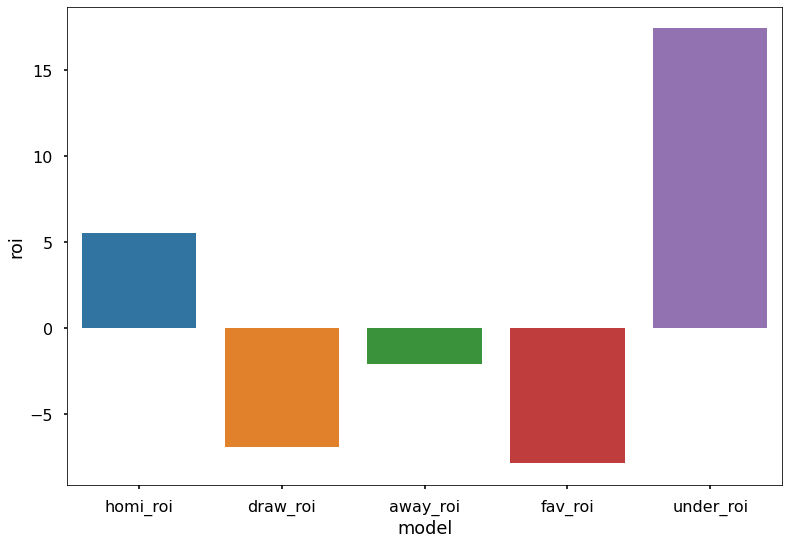

In [45]:
style.use('seaborn-poster')
sns.barplot(x='model', y='roi', data=roi_df)